### Importation des librairies

In [13]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler,LabelEncoder


In [5]:
#Load the data

file = r"C:\Users\djamb\OneDrive - Université Centrale\ML PROJECTS\PREDICTION PRIX LOGEMENT\data\housing_data.csv"
df = pd.read_csv(file)

In [6]:
df.head()

,PerCapCrimeRate,ResidentialLandOver25K,NonRetailAcresRatio,CharlesRiverDummy,NitricOxideConc,AvgNumRooms,Pre1940sOwnerOcc,WeightedDistToEmploy,RadialHighwayAccessIndex,MedianHomeTaxRate,PupilTeacherRatio,AfroAmericanProportion,LowerStatusRatio,MedianHomeValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df['RadialHighwayAccessIndex'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [11]:
le = LabelEncoder()

df['RadialHighwayAccessIndex'] = le.fit_transform(df['RadialHighwayAccessIndex'])

In [12]:
df.RadialHighwayAccessIndex.unique()

array([0, 1, 2, 4, 3, 7, 5, 6, 8], dtype=int64)

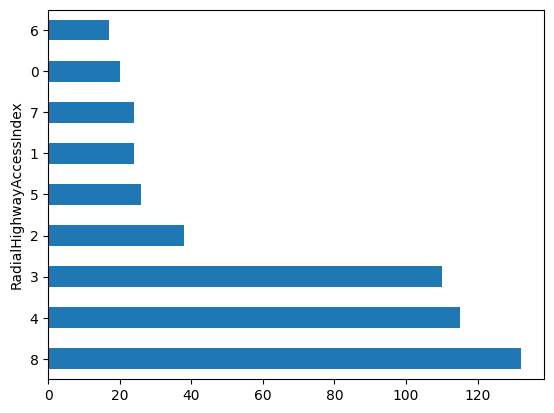

In [14]:
import matplotlib.pyplot as plt
value_counts = df['RadialHighwayAccessIndex'].value_counts()

value_counts.plot(kind='barh')
plt.show()

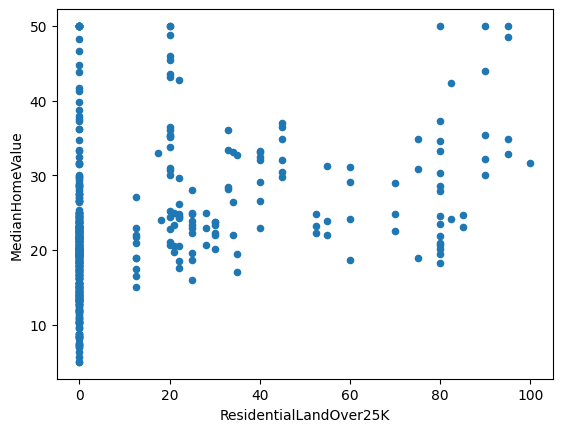

In [15]:
df.plot(kind='scatter', x='ResidentialLandOver25K', y='MedianHomeValue')
plt.show()

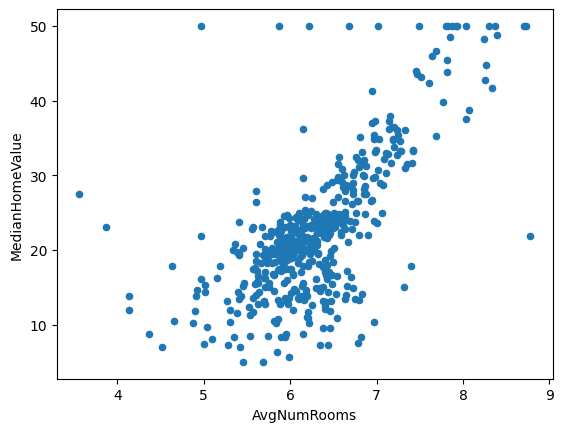

In [16]:
df.plot(kind='scatter', x='AvgNumRooms', y='MedianHomeValue')
plt.show()

In [17]:
X = df.drop(columns=['MedianHomeValue'])
y = df['MedianHomeValue']

In [18]:
X.columns

Index(['PerCapCrimeRate', 'ResidentialLandOver25K', 'NonRetailAcresRatio',
       'CharlesRiverDummy', 'NitricOxideConc', 'AvgNumRooms',
       'Pre1940sOwnerOcc', 'WeightedDistToEmploy', 'RadialHighwayAccessIndex',
       'MedianHomeTaxRate', 'PupilTeacherRatio', 'AfroAmericanProportion',
       'LowerStatusRatio'],
      dtype='object')

In [19]:
std = StandardScaler()

std.fit(X)


StandardScaler()

In [20]:
X_scaled = std.transform(X)

In [21]:
X_df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
X_df_scaled.head()

,PerCapCrimeRate,ResidentialLandOver25K,NonRetailAcresRatio,CharlesRiverDummy,NitricOxideConc,AvgNumRooms,Pre1940sOwnerOcc,WeightedDistToEmploy,RadialHighwayAccessIndex,MedianHomeTaxRate,PupilTeacherRatio,AfroAmericanProportion,LowerStatusRatio
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-1.899339,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-1.489678,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-1.489678,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.080016,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.080016,-1.106115,0.113032,0.441052,-1.026501


In [23]:
X = X_df_scaled.copy()

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
print("X_train : ",X_train.shape)
print("X_test  : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test: ",y_test.shape)

X_train :  (404, 13)
X_test  :  (102, 13)
y_train :  (404,)
y_test:  (102,)


####  Feature Selection avec Scikit-learn

In [26]:
estimator = RandomForestRegressor(n_estimators=150,criterion="squared_error",max_depth = 100)
selector = RFE(estimator, n_features_to_select=9, step=1)

selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.support_]
print('Selected columns:', selected_columns)

Selected columns: Index(['PerCapCrimeRate', 'NitricOxideConc', 'AvgNumRooms', 'Pre1940sOwnerOcc',
       'WeightedDistToEmploy', 'MedianHomeTaxRate', 'PupilTeacherRatio',
       'AfroAmericanProportion', 'LowerStatusRatio'],
      dtype='object')


### Feature selection avec feature-engine

In [29]:
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor()

sel = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring='r2',
    cv=10,
)

sel.fit(X_train, y_train)

print(sel.feature_performance_)

selected_features = sel.features_to_drop_
print("Caractéristiques sélectionnées:", selected_features)

{'PerCapCrimeRate': -0.02047190794931002, 'ResidentialLandOver25K': 0.15752866017688974, 'NonRetailAcresRatio': 0.33023712351003764, 'CharlesRiverDummy': 0.01209570753643462, 'NitricOxideConc': 0.47486704682851305, 'AvgNumRooms': 0.4076815328682481, 'Pre1940sOwnerOcc': -0.09769791078524198, 'WeightedDistToEmploy': 0.017947997255817007, 'RadialHighwayAccessIndex': 0.16089836957475173, 'MedianHomeTaxRate': 0.3043168302328335, 'PupilTeacherRatio': 0.25415848633452964, 'AfroAmericanProportion': 0.012907712211987065, 'LowerStatusRatio': 0.561661537501245}
Caractéristiques sélectionnées: ['PerCapCrimeRate', 'ResidentialLandOver25K', 'CharlesRiverDummy', 'Pre1940sOwnerOcc', 'WeightedDistToEmploy', 'RadialHighwayAccessIndex', 'AfroAmericanProportion']


In [31]:
selected_columns = ['PerCapCrimeRate', 'ResidentialLandOver25K', 'CharlesRiverDummy', 'Pre1940sOwnerOcc', 'WeightedDistToEmploy', 'RadialHighwayAccessIndex', 'AfroAmericanProportion']
X  = X[selected_columns]

In [32]:
X.head()

,PerCapCrimeRate,ResidentialLandOver25K,CharlesRiverDummy,Pre1940sOwnerOcc,WeightedDistToEmploy,RadialHighwayAccessIndex,AfroAmericanProportion
0,-0.419782,0.284830,-0.272599,-0.120013,0.140214,-1.899339,0.441052
1,-0.417339,-0.487722,-0.272599,0.367166,0.557160,-1.489678,0.441052
2,-0.417342,-0.487722,-0.272599,-0.265812,0.557160,-1.489678,0.396427
3,-0.416750,-0.487722,-0.272599,-0.809889,1.077737,-1.080016,0.416163
4,-0.412482,-0.487722,-0.272599,-0.511180,1.077737,-1.080016,0.441052


In [33]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MedianHomeValue, Length: 506, dtype: float64

In [34]:
data_frame = pd.concat([X, y], axis=1)
data_frame.head()

,PerCapCrimeRate,ResidentialLandOver25K,CharlesRiverDummy,Pre1940sOwnerOcc,WeightedDistToEmploy,RadialHighwayAccessIndex,AfroAmericanProportion,MedianHomeValue
0,-0.419782,0.284830,-0.272599,-0.120013,0.140214,-1.899339,0.441052,24.0
1,-0.417339,-0.487722,-0.272599,0.367166,0.557160,-1.489678,0.441052,21.6
2,-0.417342,-0.487722,-0.272599,-0.265812,0.557160,-1.489678,0.396427,34.7
3,-0.416750,-0.487722,-0.272599,-0.809889,1.077737,-1.080016,0.416163,33.4
4,-0.412482,-0.487722,-0.272599,-0.511180,1.077737,-1.080016,0.441052,36.2


In [35]:
path = r"C:\Users\djamb\OneDrive - Université Centrale\ML PROJECTS\PREDICTION PRIX LOGEMENT\data\data.csv"
data_frame.to_csv(path, index=False)